In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

file1 = "Resources/Hot 100 Audio Features.csv"
file2 = "Resources/Hot Stuff.csv"

audio_features = pd.read_csv(file1)
hot100 = pd.read_csv(file2)

merge_df = pd.merge(audio_features, hot100, on=["Song", "Performer", "SongID"], how="outer")

merge_df = merge_df.drop(["SongID", "spotify_track_id", "spotify_track_preview_url",
                         "spotify_track_album", "spotify_track_explicit", "time_signature",
                        "url", "key", "mode", "acousticness", "liveness", "valence"], axis=1)
merge_df.groupby(["Performer","Song"]).head()

,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,loudness,speechiness,instrumentalness,tempo,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,80.002,10/5/2019,86.0,1.0,NaN,86.0,1.0
1,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,80.002,10/12/2019,98.0,1.0,86.0,86.0,2.0
2,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/29/2019,100.0,1.0,NaN,100.0,1.0
3,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/6/2019,93.0,1.0,100.0,93.0,2.0
4,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2019,95.0,1.0,93.0,93.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322863,Jackie DeShannon,Vanilla Ólay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/17/1972,98.0,1.0,99.0,98.0,3.0
322864,Jackie DeShannon,Vanilla Ólay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/24/1972,89.0,1.0,98.0,89.0,4.0
322870,XXXTENTACION,Everybody Dies In Their Nightmares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2018,42.0,2.0,NaN,42.0,5.0
322871,XXXTENTACION,Everybody Dies In Their Nightmares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/7/2018,46.0,2.0,42.0,42.0,6.0


In [3]:
df2 = merge_df[['danceability', 'tempo', 'Peak Position','Weeks on Chart']].dropna()
df2.head()

,danceability,tempo,Peak Position,Weeks on Chart
0,0.734,80.002,86.0,1.0
1,0.734,80.002,86.0,2.0
18,0.572,95.799,28.0,1.0
19,0.572,95.799,5.0,8.0
20,0.572,95.799,5.0,17.0


In [4]:
df2_top40_final = df2.loc[(df2["Peak Position"] <= 40), :]

df2_top40_final

,danceability,tempo,Peak Position,Weeks on Chart
18,0.572,95.799,28.0,1.0
19,0.572,95.799,5.0,8.0
20,0.572,95.799,5.0,17.0
21,0.572,95.799,5.0,18.0
22,0.572,95.799,5.0,12.0
...,...,...,...,...
320908,0.318,173.305,32.0,6.0
320909,0.318,173.305,29.0,7.0
320910,0.318,173.305,28.0,8.0
320911,0.318,173.305,28.0,9.0


In [5]:
df2_weeks_final = df2.loc[(df2["Weeks on Chart"] > 12), :]

df2_weeks_final.count()

danceability      75937
tempo             75937
Peak Position     75937
Weeks on Chart    75937
dtype: int64

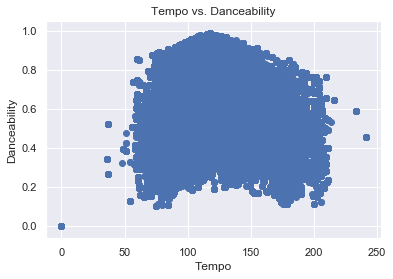

In [12]:
blob = plt.scatter(df2["tempo"], df2["danceability"], marker="o")

plt.title(f'Tempo vs. Danceability')
plt.ylabel("Danceability")
plt.xlabel("Tempo")

# Show plot
plt.show();


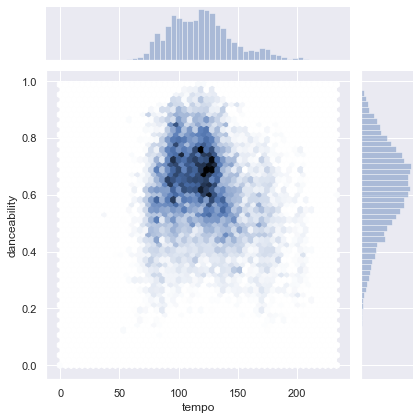

In [9]:
top40= sns.jointplot(x="tempo", y="danceability", data=df2_top40_final, kind="hex")

top40.savefig("top 40 danceability tempo.png")

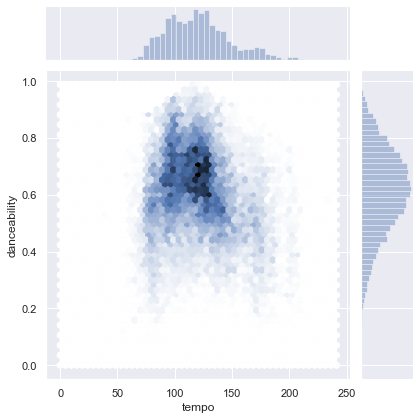

In [10]:

sns.jointplot(x="tempo", y="danceability", data=df2, kind="hex")

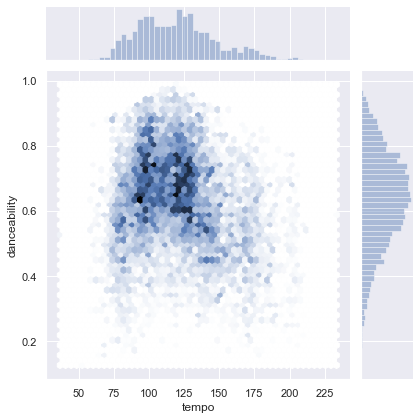

In [10]:
threemonths = sns.jointplot(x="tempo", y="danceability", data=df2_weeks_final, kind="hex")

threemonths.savefig("3 months danceability tempo.png")